# Progetto di Big Data, Data Mining e Data Analysis

Dati ottenuti dalla demo di https://autovettura.car2db.com/

## Scopo dell'analisi

Nel corso degli anni, le dimensioni delle automobili sono aumentate sempre di più a causa delle maggiori norme di sicurezza e il costante tentativo di aumentare sempre più il tasso di sopravvivenza agli incidenti. Uno degli scopi di questa analisi è quindi vedere se questo processo è stato lineare nel tempo, vedendo se un modello creato ad hoc riuscirà a predire le dimensioni moderne; e poi in seconda sede vedere come è anche cambiato lo sviluppo del motore, anch'esso in costante evoluzione e se anche lì esiste un pattern predicibile o meno.
Prendiamo perciò in esame un piccolo database di autovetture dalla demo fornita gratuitamente dal sito di cui sopra, con dati di vetture che vanno dagli anni '60 fino a quasi il 2020

### Caricamento dei dati e preprocessamento

Carichiamo innanzitutto le librerie necessarie

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('auto.csv', encoding='latin-1')
df.head()

,Marca,Modello,Anno,Serie,Carrozzeria,Posti,Lunghezza,Larghezza,Altezza,Passo,...,Diametro cilindro,Corsa pistone,Cambio,Trazione,Velocità massima,Consumo città,Consumo extraurbano,Consumo misto,Accelerazione a 100 km/h,Volume serbatoio
0,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,82,64,Manuale,Anteriore,185.0,"10,7","6,3","7,9","11,2",51
1,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,80,"67,2",Manuale,Anteriore,178.0,"10,1","6,3","8,2","12,5",51
2,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,84,72,Manuale,Anteriore,185.0,"10,7","6,3","8,1",11,51
3,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,82,75,Manuale,Anteriore,195.0,"11,1","6,5","8,1","10,2",51
4,Alfa Romeo,145,1994,Hatchback,Berlina,5,4095,1710,1430,2540,...,87,72,Manuale,Anteriore,200.0,"11,6","6,7","8,5","9,8",51


Qui di seguito le colonne e il numero di istanze non nulle. Come si può vedere alcune colonne hanno un alto numero di colonne nulle.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278 entries, 0 to 3277
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Marca                     3278 non-null   object 
 1   Modello                   3278 non-null   object 
 2   Anno                      3278 non-null   int64  
 3   Serie                     3278 non-null   object 
 4   Carrozzeria               3278 non-null   object 
 5   Posti                     3278 non-null   int64  
 6   Lunghezza                 3278 non-null   int64  
 7   Larghezza                 3278 non-null   int64  
 8   Altezza                   3278 non-null   object 
 9   Passo                     3278 non-null   int64  
 10  Peso a vuoto              3096 non-null   float64
 11  Altezza da terra          2595 non-null   object 
 12  Volume bagagliaio         1318 non-null   float64
 13  Massa totale              1517 non-null   float64
 14  Alimenta

### Significato delle colonne
Nella lista seguente la spiegazione del contenuto della colonna e/o della sua unità di misura
- **`Marca`**: marca produttrice dell'autovettura. Nello specifico di questo dataset sono solo Alfa Romeo e Nissan
- **`Modello`**: il nome del modello specifico dell'automobile, ripetuto per tutte le sue varianti di quell'anno
- **`Serie`**: macrotipo specifico a cui l'autovettura appartiene (es: berlina a 4 porte)
- **`Carrozzeria`**: macrotipo generale a cui l'autovettura appartiene (es: berlina)
- **`Posti`**: numero di posti
- **`Lunghezza`**: millimetri
- **`Larghezza`**: millimetri
- **`Altezza`**: millimetri
- **`Passo`**: distanza tra i due assi in millimetri
- **`Peso a vuoto`**: chilogrammi
- **`Altezza da terra`**: millimetri
- **`Volume bagagliaio`**: litri
- **`Massa totale`**: chilogrammi
- **`Alimentazione`**: alimentazione del motore
- **`Cilindrata`**: centimetro cubo
- **`Cavalli`**: numero di cavalli della vettura
- **`Cilindri`**: numero di cilindri del motore
- **`Diametro cilindro`**: millimetri
- **`Corsa pistone`**: millimetri
- **`Cambio`**: tipo di cambio della vettura
- **`Trazione`**: tipo di trazione
- **`Velocità massima`**: kilometri orari
- **`Consumo città`**: consumo in contesto urbano, litri consumati ogni 100 km
- **`Consumo extraurbano`**: consumo in contesto extraurbano, litri consumati ogni 100 km
- **`Consumo misto`**: consumo in contesto misto, litri consumati ogni 100 km
- **`Accelerazione a 100 km/h`**: tempo necessario per il raggiungimento dei 100 km/h, secondi
- **`Volume serbatoio`**: volume del serbatoio in litri

Variabile da calcolare:
- **`Rapporto peso/potenza`**: quanti chilogrammi deve spingere ogni cavallo di potenza, chilogrammo su cavallo

Variabili target:
- **`anno, altezza, larghezza, lunghezza`**: studio delle dimensioni delle automobili
- **`anno, cilindrata, cavalli, velocità massima, massa totale, rapporto peso/potenza`**: studio dell'evoluzione del motore

Seppur le altre colonne possano offrire spunti interessanti, quali il rapporto tra cambio e potenza, o il consumo in relazione al peso, queste non verranno prese in considerazione per l'analisi in quanto si vuole mantenere il focus sulle due macroaree sopra descritte.

### Pulizia dei dati
Definiamo dunque le colonne che non saranno prese in considerazione per l'analisi e rimuoviamole dal dataset.

In [65]:
useless_features = ['Marca', 'Modello', 'Serie', 'Posti', 
                    'Passo', 'Peso a vuoto', 'Altezza da terra', 'Volume bagagliaio', 
                    'Alimentazione', 'Cilindri', 'Diametro cilindro', 'Corsa pistone', 'Accelerazione a 100 km/h',
                    'Cambio', 'Trazione', 'Consumo città', 'Consumo extraurbano', 'Consumo misto', 'Volume serbatoio']
df = df.drop(columns=useless_features)

Definiamo la colonna categorica

In [66]:
df['Carrozzeria'] = df['Carrozzeria'].astype('category')

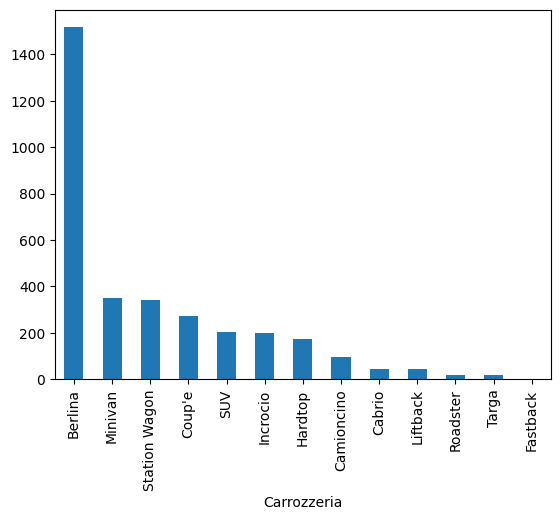

In [67]:
df['Carrozzeria'].value_counts().plot(kind='bar');

Nell'analisi delle classi emerge che il mercato sia assolutamente dominato dalle berline. Prima di giungere a conclusioni è meglio però terminare la pulizia dei dati.

Trasformiamo la colonna 'Altezza' in numerica

In [68]:
df['Altezza'] = pd.to_numeric(df['Altezza'], errors='coerce')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278 entries, 0 to 3277
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Anno              3278 non-null   int64   
 1   Carrozzeria       3278 non-null   category
 2   Lunghezza         3278 non-null   int64   
 3   Larghezza         3278 non-null   int64   
 4   Altezza           3276 non-null   float64 
 5   Massa totale      1517 non-null   float64 
 6   Cilindrata        3275 non-null   float64 
 7   Cavalli           3278 non-null   int64   
 8   Velocità massima  2059 non-null   float64 
dtypes: category(1), float64(4), int64(4)
memory usage: 208.8 KB


Come possiamo vedere in ciò che rimane del dataset, la massa totale, parametro fondamentale per l'analisi, ha più della metà dei suoi valori come nulli.
A malincuore, per non compromettere la validità dell'analisi dobbiamo eliminarne tutte le istanze nulle.

In [70]:
df.dropna(inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 3260
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Anno              1259 non-null   int64   
 1   Carrozzeria       1259 non-null   category
 2   Lunghezza         1259 non-null   int64   
 3   Larghezza         1259 non-null   int64   
 4   Altezza           1259 non-null   float64 
 5   Massa totale      1259 non-null   float64 
 6   Cilindrata        1259 non-null   float64 
 7   Cavalli           1259 non-null   int64   
 8   Velocità massima  1259 non-null   float64 
dtypes: category(1), float64(4), int64(4)
memory usage: 90.4 KB


#### Creazione della colonna rapporto peso/potenza

In [72]:
df['Rapporto peso/potenza'] = df['Massa totale'] / df['Cavalli']

In [73]:
df.head()

,Anno,Carrozzeria,Lunghezza,Larghezza,Altezza,Massa totale,Cilindrata,Cavalli,Velocità massima,Rapporto peso/potenza
0,1994,Berlina,4095,1710,1430.0,1655.0,1370.0,103,185.0,16.067961
1,1994,Berlina,4095,1710,1430.0,1670.0,1351.0,90,178.0,18.555556
2,1994,Berlina,4095,1710,1430.0,1670.0,1596.0,103,185.0,16.213592
3,1994,Berlina,4095,1710,1430.0,1685.0,1598.0,120,195.0,14.041667
4,1994,Berlina,4095,1710,1430.0,1715.0,1712.0,129,200.0,13.294574


Distribuzione delle categorie dopo l'eliminazione dei valori nulli:

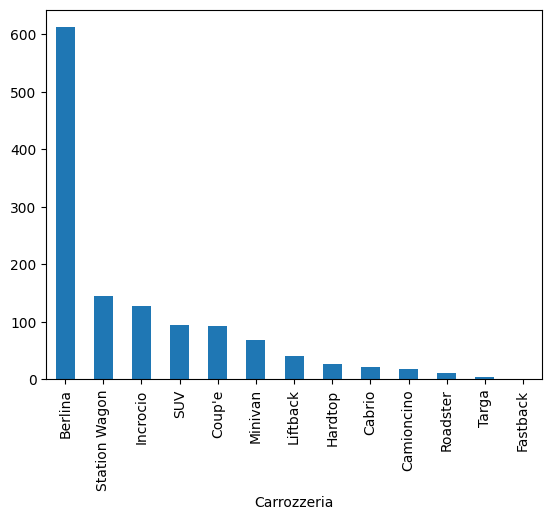

In [74]:
df['Carrozzeria'].value_counts().plot(kind='bar');

Purtroppo rispetto a prima la situazione è persino peggiorata, data la sovrarappresentazione delle berline si procederà a compiere due analisi separate:
- Una sull'intero dataset, dove si analizzerà il mercato generale
- Una sulle sole berline, per vedere se esistono differenze significative tra il mercato generale e quello delle berline

### Analisi delle dimensioni delle automobili del mercato generale nel tempo

#### Scatter delle misure

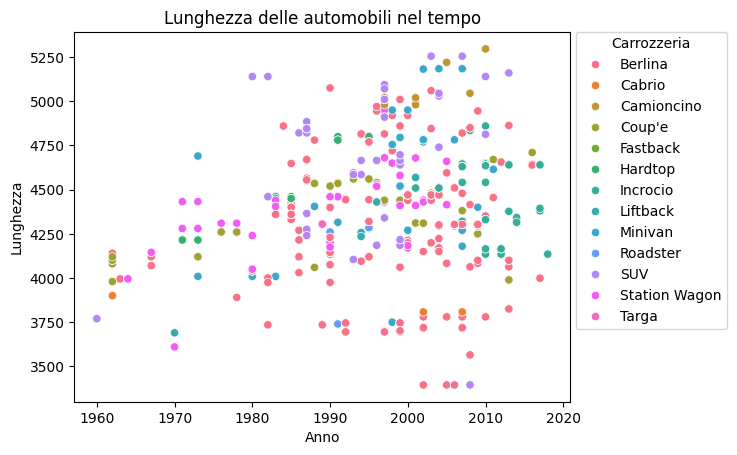

In [75]:
sns.scatterplot(data=df, x='Anno', y='Lunghezza', hue='Carrozzeria')
plt.title('Lunghezza delle automobili nel tempo')
plt.legend(bbox_to_anchor=(1.33, 1.02), title='Carrozzeria')
plt.show()

Dal grafico pare proprio che la lunghezza delle automobili sia aumentata nel tempo in maniera quasi lineare, analizziamo ora le altre due grandezze.

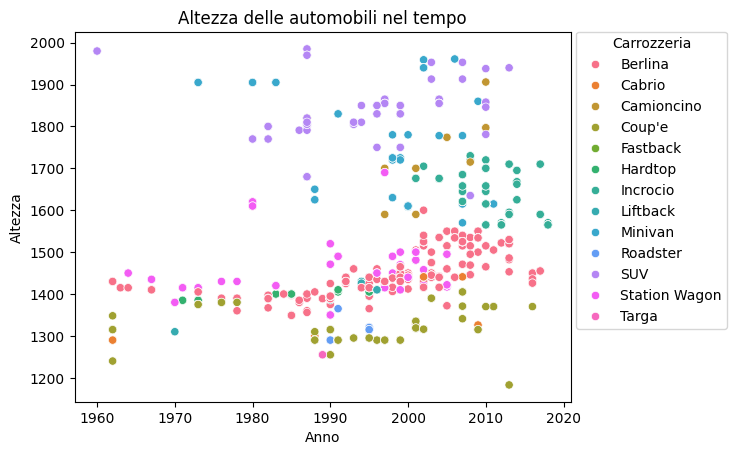

In [76]:
sns.scatterplot(data=df, x='Anno', y='Altezza', hue='Carrozzeria')
plt.title('Altezza delle automobili nel tempo')
plt.legend(bbox_to_anchor=(1.33, 1.02), title='Carrozzeria')
plt.show()

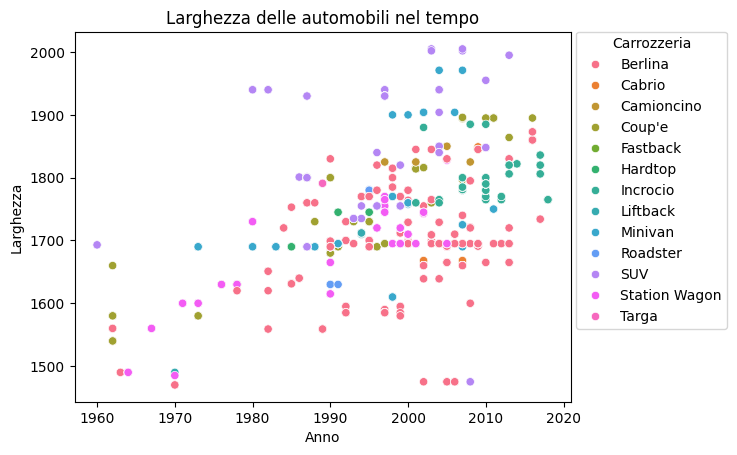

In [77]:
sns.scatterplot(data=df, x='Anno', y='Larghezza', hue='Carrozzeria')
plt.title('Larghezza delle automobili nel tempo')
plt.legend(bbox_to_anchor=(1.33, 1.02), title='Carrozzeria')
plt.show()

Come ci si poteva aspettare, la larghezzza delle automobili pare anch'essa di essere aumentata nel tempo, mentre l'altezza sembra essere rimasta costante fino al 2000 per poi aumentare leggermente negli anni seguenti.

#### Regressione delle tre misure

Dai grafici mostrati nella sezione precedente, si nota come la lunghezza e la larghezza delle automobili siano aumentate con un trend lineare, mentre l'altezza richiede un modello più complesso.
Perciò si procederà a creare un modello di regressione lineare per lunghezza e larghezza, mentre per l'altezza si utilizzerà una regressione polinomiale di grado 2 al fine di modellare la curva post 2000.

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

##### Stima della lunghezza nel tempo

Nella regressione sui dati del mercato generale ci si può aspettare quasi certamente che la regressione non sarà accurata in quanto rappresenterà la media di valori con moltissimo rumore. Procediamo allenando il modello sull'intero dataset.

In [79]:
X = df['Anno'].values.reshape(-1, 1)
y = df['Lunghezza']

In [126]:
model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [81]:
y_pred = model.predict(X)

In [128]:
accuracy = r2_score(y, y_pred)
print(f"accuracy: {accuracy}")

accuracy: 0.15779720668815223


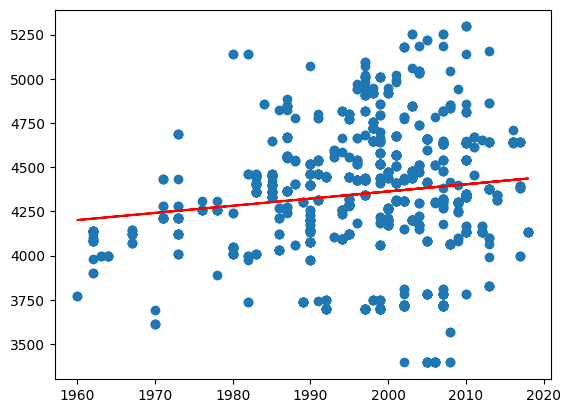

In [83]:
plt.scatter(df['Anno'], df['Lunghezza'])
plt.plot(X, y_pred, color='red');

In [84]:
r2_score(df['Lunghezza'], y_pred)

0.018058347843898814

Tramite la regressione lineare emerge chiaramente come la lunghezza delle automobili sia mediamente aumentata nel tempo, seppur leggermente. Come emerge però dallo score il modello soffre come ci si aspettava di forte incertezza dovuto al rumore dei dati in ingresso. Procederemo ora con una stima delle misure dell'anno 2025 confrontati con alcune auto reali per osservare quanto disti dalla realtà.

In [85]:
model.predict([[2025]])

array([4464.10928167])

Da dati recuperati dal sito https://it.automobiledimension.com/berline-medie.php si rileva che nel 2025 le berline medie abbiano una lunghezza tra i 4.4 e i 4.7 m. Data la grande sovrarappresentazione delle berline nel dataset di partenza è quindi evidente che nonostante la presenza di altri tipi di autovetture i dati finali si basino comunque su quella categoria di auto. Raggiungeremo le conclusioni finali confrontando la previsione allenando il modello sulle sole berline

In [86]:
df_berline = df.loc[df['Carrozzeria'] == 'Berlina']
X = df_berline['Anno'].values.reshape(-1, 1)
y = df_berline['Lunghezza']

In [87]:
model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [88]:
y_pred = model.predict(X)

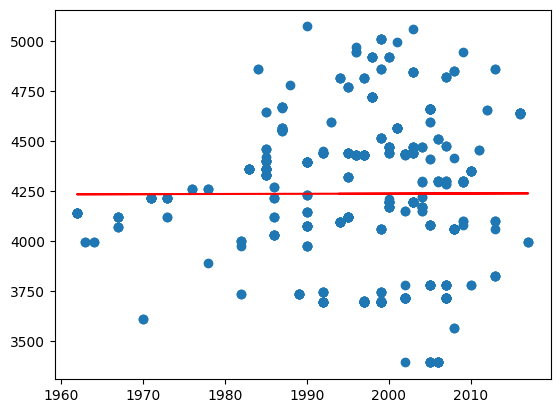

In [89]:
plt.scatter(df_berline['Anno'], df_berline['Lunghezza'])
plt.plot(X, y_pred, color='red');

In [90]:
r2_score(y, y_pred)

6.312062489910453e-06

In [91]:
model.predict([[2025]])

array([4241.38572621])

Dall’analisi delle sole berline emerge un fatto curioso: la regressione lineare suggerisce un aumento quasi nullo della lunghezza nel tempo, contrariamente a quanto osservato nel dataset generale. Questo indica che la sovrarappresentazione delle berline ha influito molto meno di quanto si temeva e che la restrizione alla sola categoria delle berline ha probabilmente sottostimato il trend reale. Di conseguenza, si è deciso di proseguire l’analisi considerando esclusivamente il mercato generale.

##### Stima della larghezza nel tempo
A seguito dei fatti emersi sopra procederemo con la sola analisi del mercato generale. Confrontando poi con le auto reali attuali.

In [92]:
X = df['Anno'].values.reshape(-1, 1)
y = df['Larghezza']

In [93]:
model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [94]:
y_pred = model.predict(X)

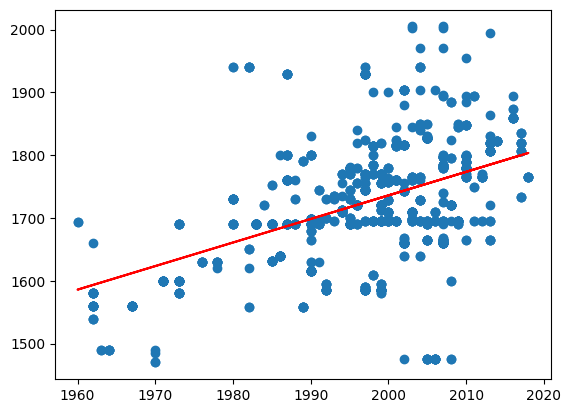

In [95]:
plt.scatter(df['Anno'], df['Larghezza'])
plt.plot(X, y_pred, color='red');

In [96]:
r2_score(y, y_pred)

0.22953858916195813

Dall'analisi della larghezza emerge che il modello sia più capace di rilevare il trend rispetto a quello precedente, mostrando un aumento significativo della largheza dei veicoli nel corso degli anni. Procediamo con la predizione

In [97]:
model.predict([[2025]])

array([1829.90415783])

Sempre secondo il sito https://it.automobiledimension.com/ le dimensioni stimate sono inesatte persino per le berline medie, a riprova che la loro sovrarappresentazione influisca meno del previsto. La predizione fatta resta comunque attuale e in linea con la larghezza riscontrata in varie categorie di auto quali berline superiori, auto familiari, monovolume, suv e altri. I risultati ottenuti sono quindi da ritenersi accettabili e in linea con le aspettative rispetto al mercato generale, soprattutto tenendo conto del fatto che sia riuscito a predire correttamente la dimensione media di categorie di auto che non erano nemmeno presenti nel dataset.

##### Stima dell'altezza nel tempo
Procediamo dunque con la stima dell'altezza delle auto sul mercato facendo uso di un modello polinomiale semplice nel tentativo di catturare la curva post 2000

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [99]:
X = df['Anno'].values.reshape(-1, 1)
y = df['Altezza'].values


In [100]:
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

In [101]:
model.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('poly_features', ...), ('lin_reg', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


In [102]:
X_plot = np.linspace(X.min(), X.max(), y.shape[0]).reshape(-1, 1)
y_pred = model.predict(X_plot)

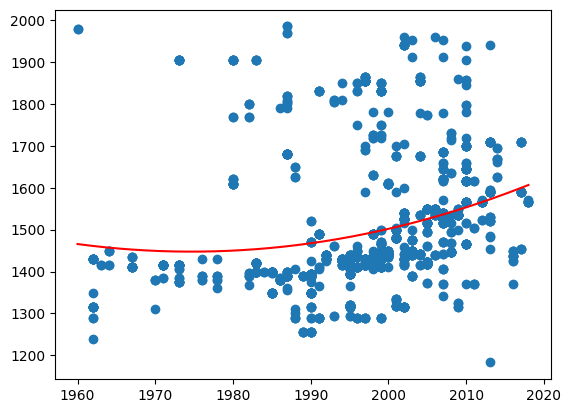

In [103]:
plt.scatter(df['Anno'], df['Altezza'])
plt.plot(X_plot, y_pred, color='red');

In [104]:
r2_score(y, y_pred)

0.20146261903893692

La regressione sull'altezza del modello polinomiale sembra essere in linea col grafico seppur discostato verso l'alto a causa dei valori outlier. Procediamo ora con la predizione.

In [105]:
model.predict([[2025]])

array([1662.11629423])

Questa volta il valore predetto si adatta solo ad alcuni modelli specifici di SUV ma non si adatta affatto alla media probabilmente a causa della y discostata verso l'alto. Riproviamo rimuovendo gli outlier.

In [106]:
df['Altezza'].describe()

count    1259.000000
mean     1500.334392
std       153.582684
min      1183.000000
25%      1410.000000
50%      1440.000000
75%      1557.500000
max      1985.000000
Name: Altezza, dtype: float64

Per tentare di risolvere il problema proviamo a rimuovere i record con più di due deviazioni standard dalla media

In [107]:
media = df['Altezza'].mean()
stdev = df['Altezza'].std()

In [108]:
df_pulito = df[(df['Altezza'] >= media - 2 * stdev) & (df['Altezza'] <= media + 2 * stdev)]

Ripetiamo ora le stesse identiche operazioni di prima

In [109]:
X = df_pulito['Anno'].values.reshape(-1, 1)
y = df_pulito['Altezza'].values

In [110]:
model.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('poly_features', ...), ('lin_reg', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


In [111]:
X_plot = np.linspace(X.min(), X.max(), y.shape[0]).reshape(-1, 1)
y_pred = model.predict(X_plot)

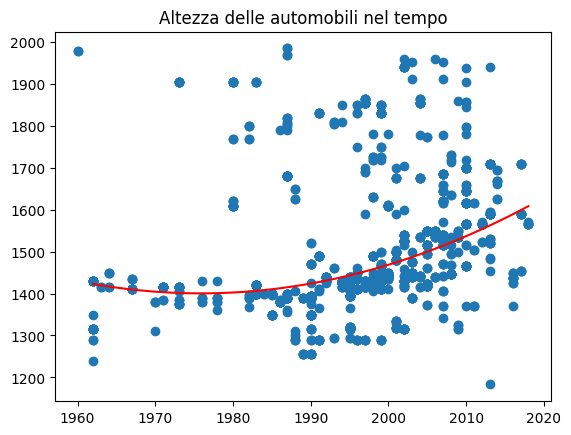

In [112]:
plt.scatter(df['Anno'], df['Altezza'])
plt.title('Altezza delle automobili nel tempo')
plt.plot(X_plot, y_pred, color='red');

In [113]:
r2_score(y, y_pred)

0.3326551772130636

Ora il modello ha uno score ben più elevato di prima e sembra adattarsi molto meglio alla curva. Proviamo la predizione

In [114]:
model.predict([[2025]])

array([1683.4913244])

Curiosamente tentare di pulire i dati ha reso la curva più ripida. Nonostante il punteggio maggiore il risultato è peggiore e dista più dalla realtà di quello precedente. Si può quindi assumere che la presunta curva vada ridotta ad una regressione lineare standard. Procediamo sempre col dataset pulito da outlier esagerati.

In [115]:
X = df_pulito['Anno'].values.reshape(-1, 1)
y = df_pulito['Altezza']

In [116]:
model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [117]:
y_pred = model.predict(X)

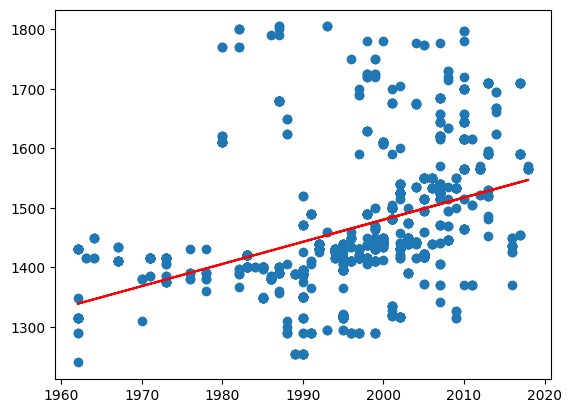

In [118]:
plt.scatter(df_pulito['Anno'], df_pulito['Altezza'])
plt.plot(X, y_pred, color='red');

In [119]:
r2_score(y, y_pred)

0.15779720668815223

Seppur lo score del modello sia nettamente inferiore ai precedenti la linea appare ben più bassa delle due curve precedenti. Procediamo col predict.

In [120]:
model.predict([[2025]])

array([1573.19686956])

Il risultato ottenuto con la regressione lineare risulta leggermente superiore alla media, ma significativamente inferiore rispetto ai tentativi precedenti con un modello più complesso. La misura predetta è inoltre coerente con un numero maggiore di automobili presenti sul mercato in varie categorie. È quindi evidente che si è cercato di usare un modello eccessivamente complicato per un dataset troppo ridotto che ha portato probabilmente ad una situazione di overfitting.

##### Considerazioni finali sull'analisi delle misure spaziali
Alla luce dei risultati emersi dalla precedente analisi si può affermare che esiste un trend misurabile e predicibile che coinvolge il mercato automobilistico che porta le auto ad aumentare sempre più di dimensione nel corso del tempo. Si può inoltre affermare che questi trend si possono tutti e tre descrivere con dei semplici modelli di regressione lineare e che un tentativo di fare uso di modelli più complicati possa portare a situazioni di overfitting.

---

# Studio dell'evoluzione "**Rapporto peso-potenza**"

Prima di tutto analizziamo quali sono le variabili che influenzano di più il rapporto peso-potenza

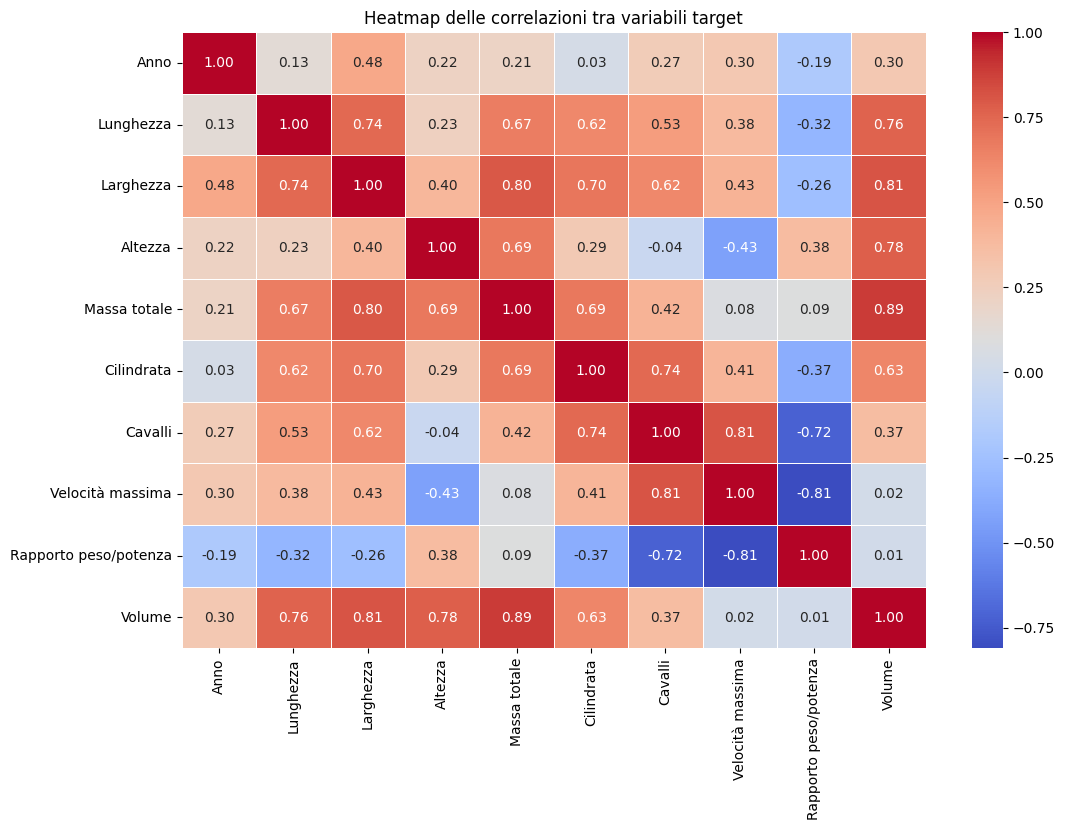

In [ ]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

#Creazione della heatmap
plt.figure(figsize= (12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap delle correlazioni tra variabili target")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 3260
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Anno                   1259 non-null   int64   
 1   Carrozzeria            1259 non-null   category
 2   Lunghezza              1259 non-null   int64   
 3   Larghezza              1259 non-null   int64   
 4   Altezza                1259 non-null   float64 
 5   Massa totale           1259 non-null   float64 
 6   Cilindrata             1259 non-null   float64 
 7   Cavalli                1259 non-null   int64   
 8   Velocità massima       1259 non-null   float64 
 9   Rapporto peso/potenza  1259 non-null   float64 
dtypes: category(1), float64(5), int64(4)
memory usage: 100.2 KB


Tenendo conto delle colonne che abbiamo ne dobbiamo aggiungere una in più per eseguire uno studio sensato: il volume

In [131]:
df['Volume'] = df['Lunghezza'] * df['Larghezza'] * df['Altezza']

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 3260
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Anno                   1259 non-null   int64   
 1   Carrozzeria            1259 non-null   category
 2   Lunghezza              1259 non-null   int64   
 3   Larghezza              1259 non-null   int64   
 4   Altezza                1259 non-null   float64 
 5   Massa totale           1259 non-null   float64 
 6   Cilindrata             1259 non-null   float64 
 7   Cavalli                1259 non-null   int64   
 8   Velocità massima       1259 non-null   float64 
 9   Rapporto peso/potenza  1259 non-null   float64 
 10  Volume                 1259 non-null   float64 
dtypes: category(1), float64(6), int64(4)
memory usage: 110.1 KB


In [ ]:
# analisis of the weight/power ratio over the years
X = df['Anno'].valaues.reshape(-1,1)
y = df['Rapporto peso/potenza']
model = LinearRegression()
